In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

 ## 5. How many rows and columns are in gdp_df? What are the data types of each column?
7662 rows, 4 columns. Object,int64,float64,float64

In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## 6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country','Value' : 'GDP_Per_Capita' })

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [9]:
gdp_df.value_counts(['Year'])

Year
2013    242
2020    242
2019    242
2018    242
2017    242
2016    242
2015    242
2014    242
2021    241
2011    240
2012    240
2010    239
2009    239
2008    238
2007    237
2006    237
2005    236
2004    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

In [10]:
counts_df = gdp_df['Country'].value_counts().to_frame()
counts_df

,count
Country,
Least developed countries: UN classification,33
Middle East & North Africa,33
Middle East & North Africa (IDA & IBRD),33
Middle income,33
Mongolia,33
...,...
Kosovo,15
Sint Maarten (Dutch part),14
Turks and Caicos Islands,12


In [11]:
counts_df.value_counts()

count
33       202
28        10
32         5
23         4
31         3
22         3
29         2
26         2
10         2
12         1
25         1
20         1
19         1
16         1
30         1
15         1
14         1
24         1
Name: count, dtype: int64

In [12]:
counts_df.reset_index()

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [13]:
counts_df.loc[counts_df['count'] < 33].reset_index()

,Country,count
0,Hungary,32
1,Lebanon,32
2,Aruba,32
3,Tonga,32
4,Bhutan,32
5,Slovak Republic,31
6,Kuwait,31
7,Turkmenistan,31
8,Cambodia,30
9,West Bank and Gaza,29


## 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
202 countries have all year data. See above table. I notice the 90's saw a steady increase in observations until 1999 where 2021, 2022 saw a dip in countries being observed. The most recent years seem to have lower observations.

## 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
I notice that most countries fall between 0-20,000 which is represented in all the graphs. The histogram gives the count of how many countries fall within their respective GDP range, while all the other graphs do not display a count.

In [14]:
gdp_df_2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp_df_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


c:\Users\Jasmine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


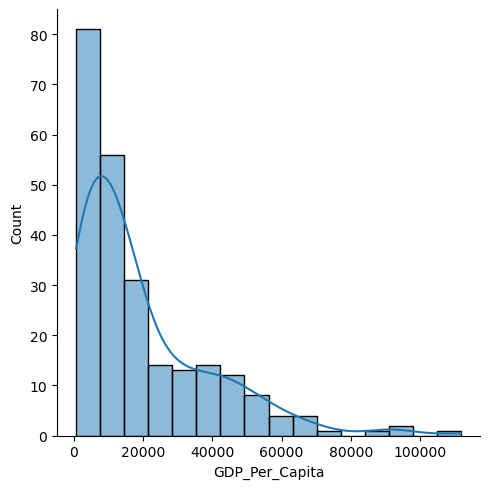

In [15]:
sns.displot( data=gdp_df_2020['GDP_Per_Capita'], kde=True );

c:\Users\Jasmine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


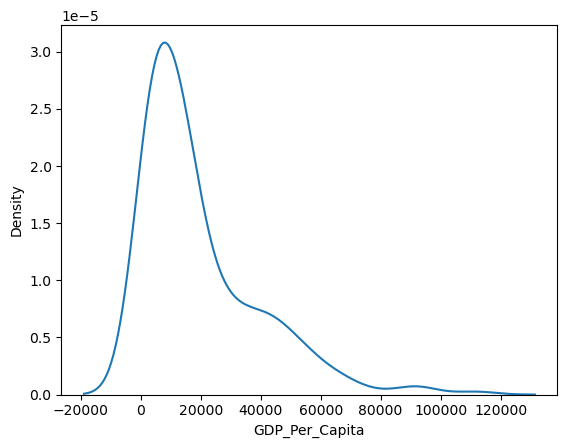

In [16]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita']);

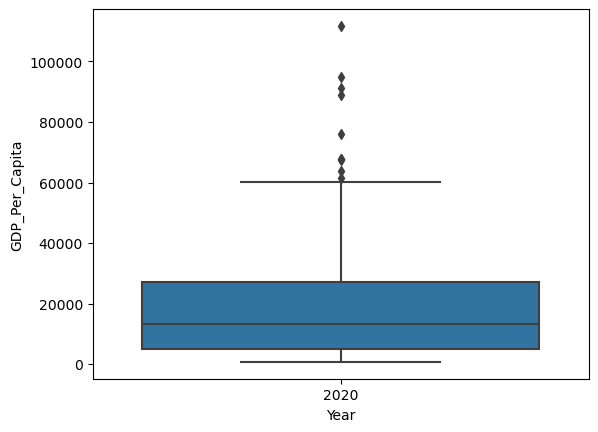

In [17]:
sns.boxplot( x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"] );

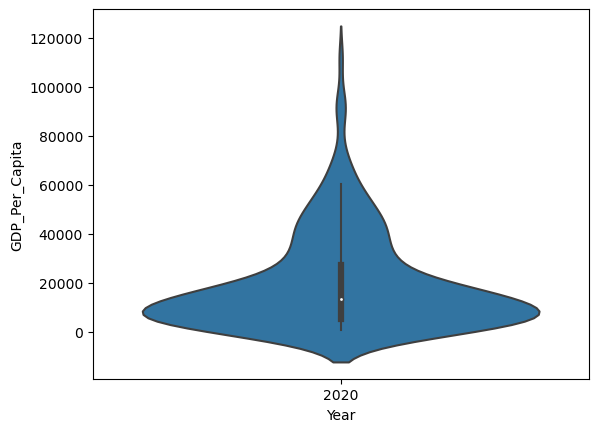

In [18]:
sns.violinplot(x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"]);

## 9. What was the median GDP per capita value in 2020?
13357.997573

In [19]:
gdp_df_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


## 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

GDP values over time seem to trend upward each decade.1990-2010 have significant growth per decade whereas 2010-2020 does not have as significant an increase.As far as strengths of each plot: The box plot shows the outliers,the barplot showed the growth increase better,and the scatter plot with regression showed the upward trend easily.The weaknesses with the box plot are the GDP counts are harder to determine, the barplot lacks the outliers and the scatter plots also don't show the GDP count detail very well.

In [20]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [21]:
my_year =[1990,2000,2010,2020]
gdp_decades = gdp_df.loc[gdp_df.Year.isin(my_year)]
gdp_decades 

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


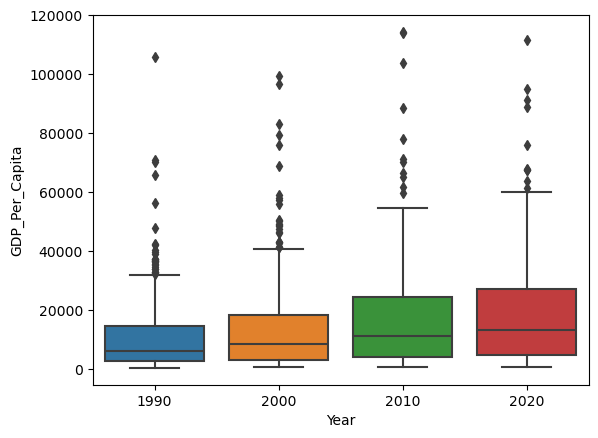

In [22]:
sns.boxplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita' );

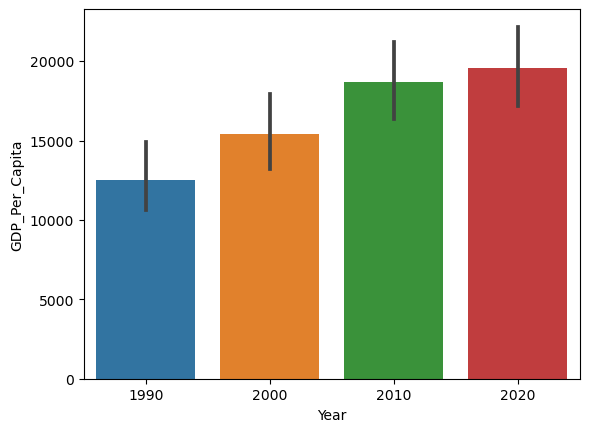

In [23]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita']);

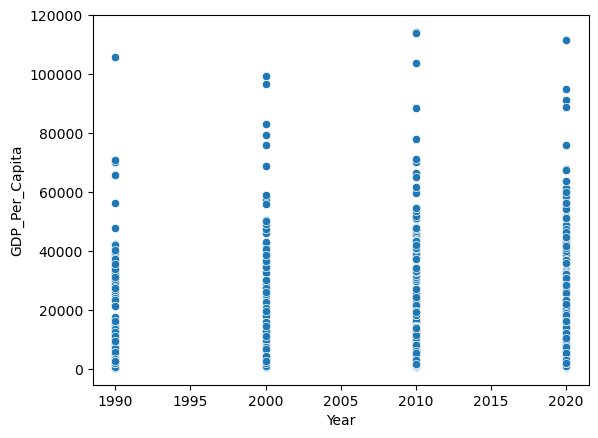

In [24]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"]);

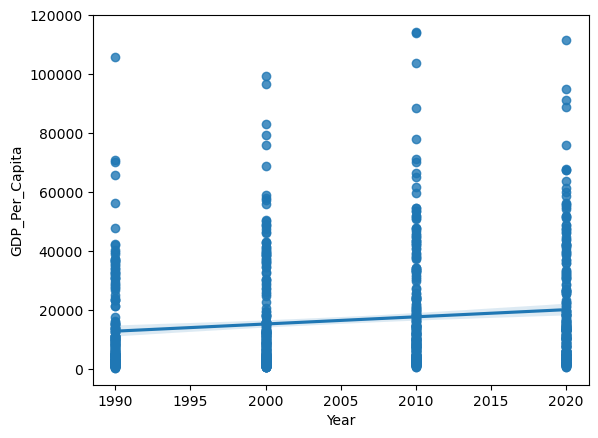

In [25]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"]);

##  11. Which country was the first to have a GDP per capita greater than $100,000?
United Arab Emirates in 1990

In [26]:
gdp_df.loc[gdp_df.GDP_Per_Capita > 100000 ]

,Country,Year,GDP_Per_Capita
3277,Ireland,2022,113870.785550
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563


## 12.  Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
Luxembourg had the highest GDP in 2020.
See line graph below:

In [27]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [28]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


In [29]:
gdp_lux = gdp_df.loc[gdp_df.Country == 'Luxembourg']
gdp_lux

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


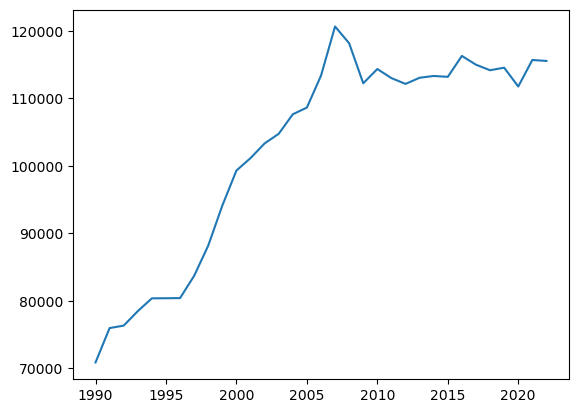

In [30]:
plt.plot( 'Year', 'GDP_Per_Capita', data=gdp_lux);

## 13.  Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
Burundi had the lowest GDP.
See line chart below:

In [31]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


In [32]:
gdp_bur = gdp_df.loc[gdp_df.Country == 'Burundi']
gdp_bur

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


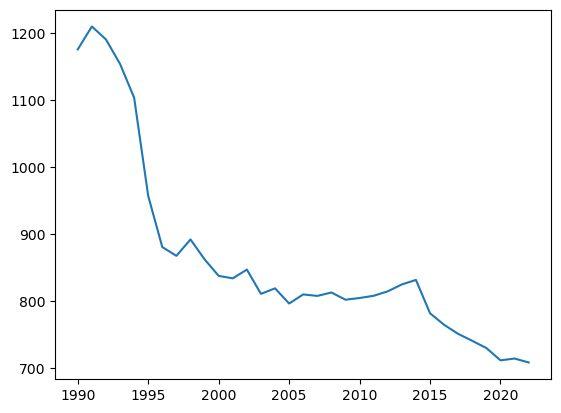

In [33]:
plt.plot( 'Year', 'GDP_Per_Capita', data=gdp_bur);

## 14.  Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [34]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows = 6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [35]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


## 15.  Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [36]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [37]:
internet_df = internet_df.rename(columns = {'Country or Area':'Country','Value' :'Internet_Users_pct' })
internet_df

,Country,Year,Internet_Users_pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


## 16.  Look at the number of observations in this dataset per year. What do you notice?
As the years progress, internet usage percent increases.

## 17.  What is the first year to have a non-zero internet users percentage value?
1995 

In [38]:
internet_df.loc[internet_df.Internet_Users_pct > 0.000000 ].sort_values(by = 'Internet_Users_pct', ascending = False)

,Country,Year,Internet_Users_pct
5716,United Arab Emirates,2022,100.000000
4497,Qatar,2022,100.000000
398,Bahrain,2022,100.000000
5718,United Arab Emirates,2020,100.000000
5717,United Arab Emirates,2021,100.000000
...,...,...,...
2646,India,1992,0.000111
1535,Democratic Republic of the Congo,1996,0.000108
1425,Cuba,1995,0.000092
5445,Thailand,1991,0.000052


## 18. How does the distribution of internet users percent differ for 2000 and 2014?
See box plot below:
Year 2000 data contains many outliers while 2014 has no outliers. Year 2014 has a very even distribution compared to a more uneven distribution for the year 2000.

In [39]:
my_years = [2014, 2000]
internet_2000 = internet_df.loc[internet_df.Year.isin(my_years)]
internet_2000.reset_index()

,index,Country,Year,Internet_Users_pct
0,5,Afghanistan,2014,7.000000
1,28,Albania,2014,54.300000
2,42,Albania,2000,0.114097
3,57,Algeria,2014,29.500000
4,71,Algeria,2000,0.491706
...,...,...,...,...
409,6017,Yemen,2000,0.082500
410,6031,Zambia,2014,6.500000
411,6045,Zambia,2000,0.191072
412,6061,Zimbabwe,2014,16.364700


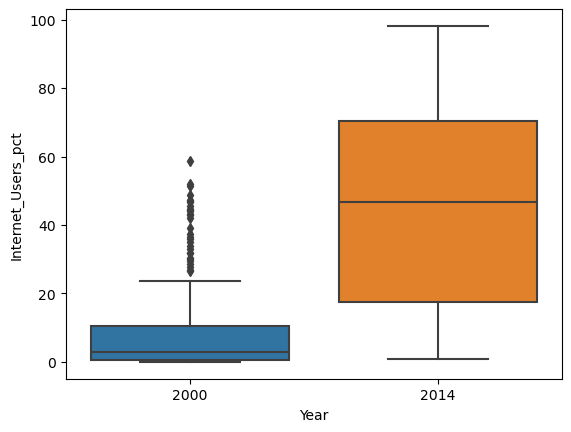

In [40]:
sns.boxplot(data = internet_2000, x = 'Year', y = 'Internet_Users_pct' );

## 19. For how many countries was the percentage of internet users below 5% in 2014? 
 10 countries

In [41]:
internet_df.loc[internet_df.Internet_Users_pct < 5 ].loc[internet_df.Year == 2014]

,Country,Year,Internet_Users_pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


## 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [42]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df,
        left_on = ['Country','Year'], right_on = ['Country','Year'],
        how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,17.600000
3,Afghanistan,2018,2060.698973,16.800000
4,Afghanistan,2017,2096.093111,13.500000
...,...,...,...,...
9107,Yemen,1999,NaN,0.056629
9108,Yemen,1998,NaN,0.023323
9109,Yemen,1997,NaN,0.015025
9110,Yemen,1996,NaN,0.000621


## 21.  Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [43]:
gdp_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014].sort_values(by = 'Internet_Users_pct', ascending = False)
gdp_2014

,Country,Year,GDP_Per_Capita,Internet_Users_pct
2993,Iceland,2014,50450.741612,98.1580
8131,Falkland (Malvinas) Islands,2014,NaN,97.6000
687,Bermuda,2014,77361.104881,96.8000
5212,Norway,2014,62838.515727,96.3005
1669,Denmark,2014,52048.335493,95.9935
...,...,...,...,...
6949,The Gambia,2014,1885.142034,NaN
7167,Turks and Caicos Islands,2014,24661.145053,NaN
7377,Upper middle income,2014,14063.487284,NaN
7542,West Bank and Gaza,2014,5967.073437,NaN


In [44]:
mylist = ['Iceland','Falkland (Malvinas) Islands', 'Bermuda']
top3 = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(mylist)]
top3

,Country,Year,GDP_Per_Capita,Internet_Users_pct
679,Bermuda,2022,81165.650944,NaN
680,Bermuda,2021,78570.489515,NaN
681,Bermuda,2020,76117.804744,NaN
682,Bermuda,2019,81681.726668,NaN
683,Bermuda,2018,81423.408453,NaN
...,...,...,...,...
8341,Iceland,1994,NaN,6.794810
8342,Iceland,1993,NaN,2.667830
8343,Iceland,1992,NaN,1.539160
8344,Iceland,1991,NaN,0.505129


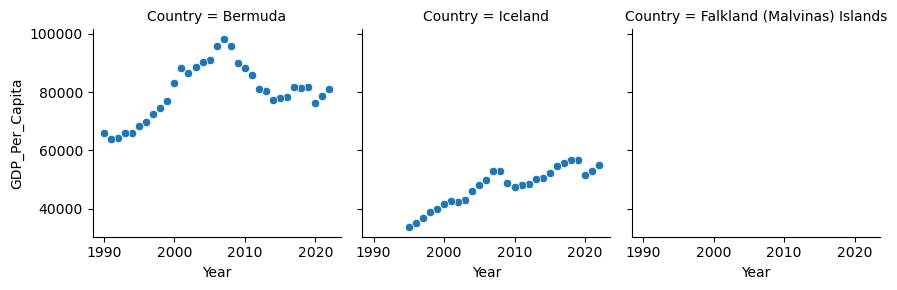

In [45]:
plot = sns.FacetGrid(top3, col="Country")
plot.map(sns.scatterplot, "Year", "GDP_Per_Capita");

## 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [46]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year']== 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_pct
7,Afghanistan,2014,2144.449634,7.0000
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,54.3000
127,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8954,Syrian Arab Republic,2014,NaN,28.0900
8991,Türkiye,2014,NaN,51.0374
9022,Venezuela,2014,NaN,57.0000
9049,Virgin Islands (US),2014,NaN,50.0700


## 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

The plot seems to show a upward trend for both GDP and Internet percent. One could infer that there is a positive correlation between GDP and internet usage percent.There are some outliers once the plot gets to 100 Internet_Users_pct and outliers at the beginning of the plot.The outliers at the 20 percent range may suggest that some countries had a higher GDP yet a lower internet usage percentage.

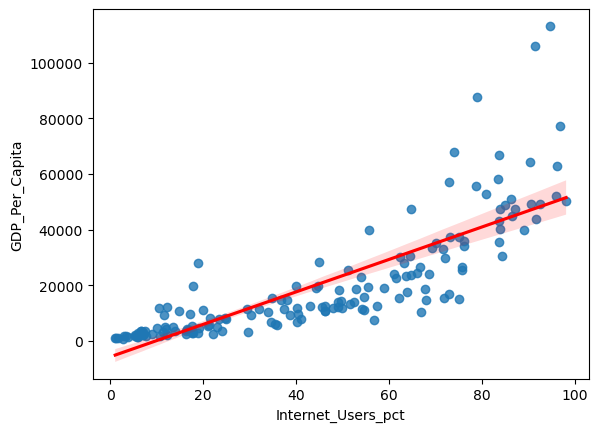

In [47]:
sns.regplot(x=gdp_and_internet_use_2014["Internet_Users_pct"], y=gdp_and_internet_use_2014["GDP_Per_Capita"],  line_kws={"color": "r"});

## **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [48]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],3,['Low','Medium','High'])


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_19328\1174488073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],3,['Low','Medium','High'])


In [49]:
gdp_and_internet_use_2014_no_nulls = gdp_and_internet_use_2014.dropna().reset_index()
gdp_and_internet_use_2014_no_nulls

,index,Country,Year,GDP_Per_Capita,Internet_Users_pct,GDP_group
0,7,Afghanistan,2014,2144.449634,7.0000,Low
1,94,Albania,2014,11586.817446,54.3000,Medium
2,127,Algeria,2014,11561.259795,29.5000,Medium
3,160,Angola,2014,8183.164577,21.3623,Medium
4,193,Antigua and Barbuda,2014,18779.139077,67.7800,Medium
...,...,...,...,...,...,...
157,7443,Uzbekistan,2014,6075.192224,35.5000,Low
158,7476,Vanuatu,2014,2917.677875,18.8000,Low
159,7509,Viet Nam,2014,7641.909252,41.0000,Medium
160,7604,Zambia,2014,3375.941270,6.5000,Low


c:\Users\Jasmine\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


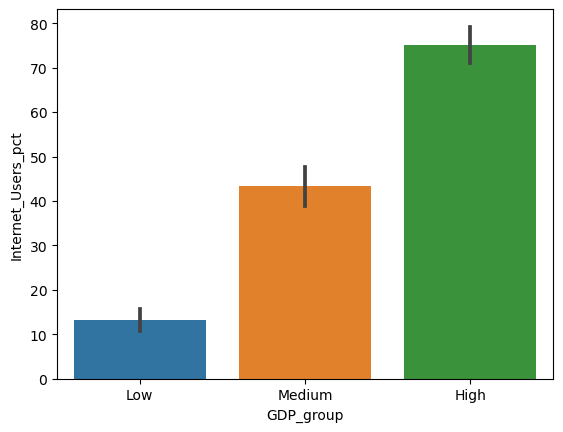

In [50]:
sns.barplot(x=gdp_and_internet_use_2014_no_nulls['GDP_group'], y=gdp_and_internet_use_2014_no_nulls['Internet_Users_pct']);

c:\Users\Jasmine\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


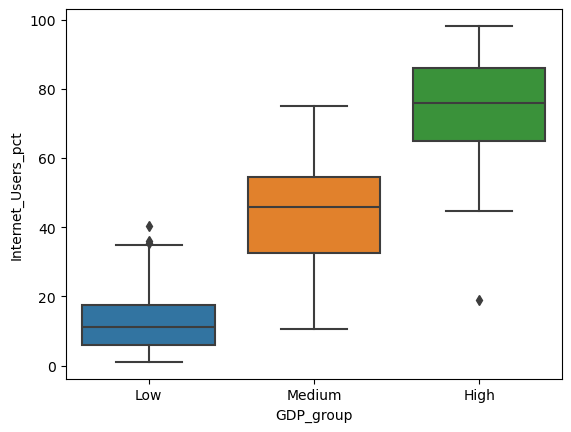

In [51]:
sns.boxplot(data = gdp_and_internet_use_2014_no_nulls, x = 'GDP_group', y = 'Internet_Users_pct' );

### Bonus exercise:
1.  Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore. 


In [52]:
 electric_df = pd.read_csv('../data/UNdata_Electricity.csv')

In [53]:
electric_df = electric_df.rename(columns = {'Country or Area': 'Country'})

In [54]:
un_data = pd.merge(gdp_and_internet_use,electric_df,
        left_on = ['Country','Year'], right_on = ['Country','Year'],
        how = 'outer')
un_data

,Country,Year,GDP_Per_Capita,Internet_Users_pct,Commodity - Transaction,Unit,Quantity,Quantity Footnotes
0,Afghanistan,2021.0,1517.016266,NaN,Electricity - total net installed capacity of ...,"Kilowatts, thousand",135.0,1.0
1,Afghanistan,2020.0,1968.341002,NaN,Electricity - total net installed capacity of ...,"Kilowatts, thousand",135.0,1.0
2,Afghanistan,2019.0,2079.921861,17.6,Electricity - total net installed capacity of ...,"Kilowatts, thousand",135.0,1.0
3,Afghanistan,2018.0,2060.698973,16.8,Electricity - total net installed capacity of ...,"Kilowatts, thousand",135.0,1.0
4,Afghanistan,2017.0,2096.093111,13.5,Electricity - total net installed capacity of ...,"Kilowatts, thousand",135.0,1.0
...,...,...,...,...,...,...,...,...
10446,"Yemen, Dem. (former)",1990.0,NaN,NaN,Electricity - total net installed capacity of ...,"Kilowatts, thousand",275.0,1.0
10447,"Yugoslavia, SFR (former)",1991.0,NaN,NaN,Electricity - total net installed capacity of ...,"Kilowatts, thousand",12495.0,1.0
10448,"Yugoslavia, SFR (former)",1990.0,NaN,NaN,Electricity - total net installed capacity of ...,"Kilowatts, thousand",12553.0,1.0
10449,fnSeqID,NaN,NaN,NaN,Footnote,NaN,NaN,NaN


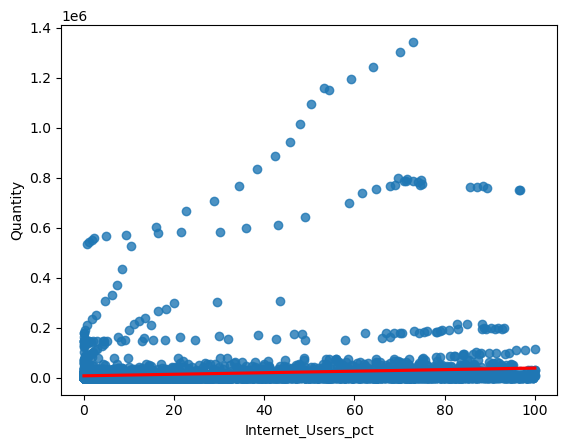

In [55]:
sns.regplot(x=un_data["Internet_Users_pct"], y=un_data["Quantity"],  line_kws={"color": "r"});

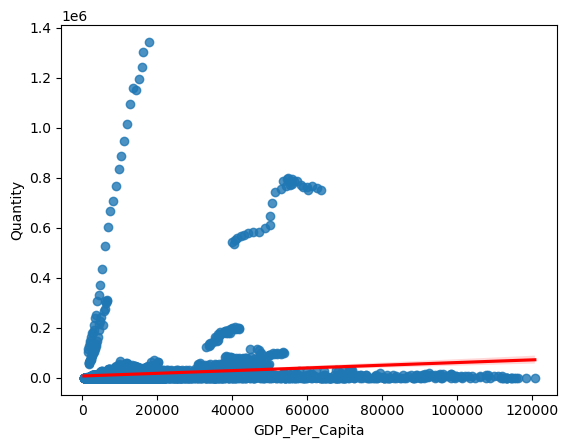

In [56]:
sns.regplot(x=un_data["GDP_Per_Capita"], y=un_data["Quantity"],  line_kws={"color": "r"});